Loaded 100 cases.
Case 47 - cont_obj: 0.5264963758982866, exact_obj: -0.7047012101020751, qaoa_obj: -14.590018231581858, unconstrained_cont_obj: 0.3028284466999282


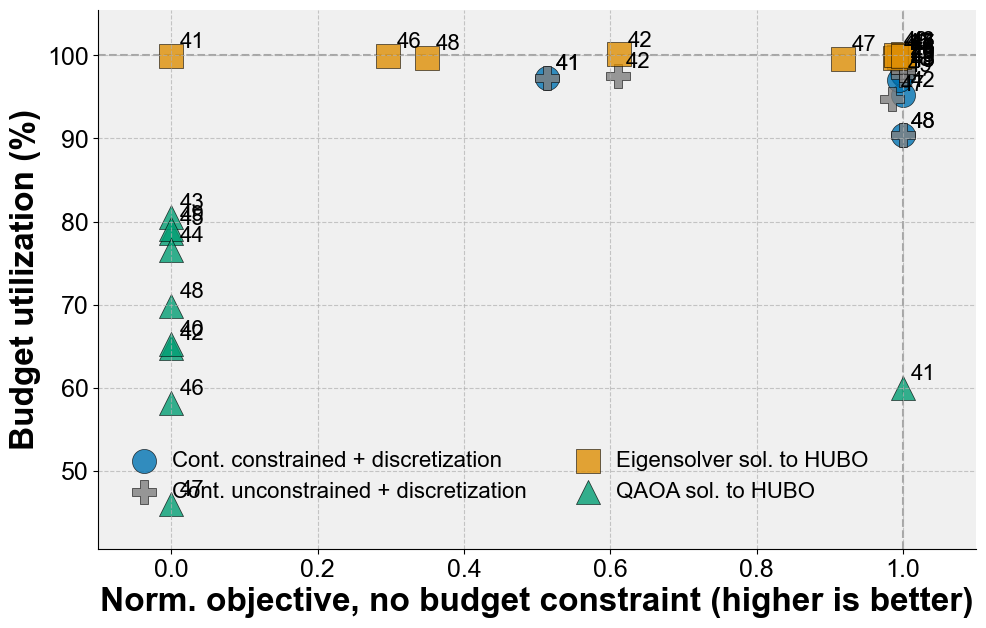

In [3]:
import os
from vis import load_json, compare_solutions, plot_objective_vs_budget

# Define the lambda folders to check
lambda_folders = {
    0.001: "lambda_0001",
    0.01: "lambda_001",
    0.1: "lambda_01",
    1.0: "lambda_1",
    0.9: "lambda_09",
    10.0: "lambda_10",
    100.0: "lambda_100",
    1000.0: "lambda_1000"
}

method = "cmaes"
base_path = f"../results/{method}_hubo_results/"

# Dictionary to store the best results and lambdas for each case
data = {}
best_lambdas = {}

best_exact_data = {}
best_exact_lambdas = {}

# Process each lambda folder
for lambda_val, lambda_folder in lambda_folders.items():
    folder_path = os.path.join(base_path, lambda_folder)
    if not os.path.exists(folder_path):
        print(f"Warning: Folder {folder_path} does not exist. Skipping.")
        continue
        
    files = [file for file in os.listdir(folder_path) if "portfolio_optimization_" in file]
    
    # Process each file
    for file in files:
        file_path = os.path.join(folder_path, file)
        file_data = load_json(file_path)
        
        # For each case in the file
        for case_id, case_data in file_data.items():
            # Get expectation value
            expectation_val = case_data['qaoa_solution']["final_expectation_value"] #['objective_values'][-1]
            
            # If we haven't seen this case before, or if this result is better
            if case_id not in data or expectation_val < data[case_id]['qaoa_solution']["final_expectation_value"]: #['objective_values'][-1]:
                data[case_id] = case_data
                best_lambdas[case_id] = lambda_val

data2 = load_json("../results/classical_unconstrained/filtered_portfolio_optimization_results.json")
data3 = load_json("../results/classical_constrained/filtered_portfolio_optimization_results.json")
data4 = load_json("../results/exact_eigensolver/filtered_portfolio_optimization_results.json")

print(f"Loaded {len(data)} cases.")
nqubits = 15
path = f"./{nqubits}_qubits"
results = compare_solutions(data, data2, data3, data4)

subset_of_results = {}
for key in list(results.keys()):
    n_qubits = results[key]["n_qubits"]
    if n_qubits == nqubits:
        subset_of_results[key] = results[key]

# Use the new plotting function
fig, ax = plot_objective_vs_budget(subset_of_results, save_path=path + "_obj_vs_budget.png")